Johanes Paulus Bernard Purek  
DQLab Class-Kelas Penerapan di Industri-Data Science in Telco: Data Cleansing   
April 2025

# **Tugas dan Langkah**

Sebagai seorang data scientist, kamu diminta untuk menyiapkan data sebelum dilakukan permodelan.

Pada tugas kali ini, kamu akan melakukan Data Preprocessing (Data Cleansing) bulan lalu, yakni Juni 2020.

Langkah yang akan dilakukan adalah,

1. Mencari ID pelanggan (Nomor telepon) yang valid
2. Mengatasi data-data yang masih kosong (Missing Values)
3. Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable
4. Menstandardisasi Nilai dari Variable

# **Informasi Dataset**

Untuk detail datanya adalah sebagai berikut:

- `UpdatedAt` Periode of Data taken
- `customerID` Customer ID
- `gender` Whether the customer is a male or a female (Male, Female)
- `SeniorCitizen` Whether the customer is a senior citizen or not (1, 0)
- `Partner` Whether the customer has a partner or not (Yes, No)
- `Dependents` Whether the customer has dependents or not (Yes, No)
- `tenure` Number of months the customer has stayed with the company
- `PhoneService` Whether the customer has a phone service or not (Yes, No)
- `MultipleLines` Whether the customer has multiple lines or not (Yes, No, No phone service)
- `InternetService` Customer's internet service provider (DSL, Fiber optic, No)
- `OnlineSecurity` Whether the customer has online security or not (Yes, No, No internet service)
- `OnlineBackup` Whether the customer has online backup or not (Yes, No, No internet service)
- `DeviceProtection` Whether the customer has device protection or not (Yes, No, No internet service)
- `TechSupport` Whether the customer has tech support or not (Yes, No, No internet service)
- `StreamingTV` Whether the customer has streaming TV or not (Yes, No, No internet service)
- `StreamingMovies` Whether the customer has streaming movies or not (Yes, No, No internet service)
- `Contract` The contract term of the customer (Month-to-month, One year, Two year)
- `PaperlessBilling` Whether the customer has paperless billing or not (Yes, No)
- `PaymentMethod` The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharges` The amount charged to the customer monthly
- `TotalCharges` The total amount charged to the customer
- `Churn` Whether the customer churned or not (Yes or No)

# **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Dataset**

In [17]:
pd.options.display.max_columns = 50
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

In [18]:
df_load.shape

(7113, 22)

In [19]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
print(df_load['customerID'].nunique())
print(df_load.customerID.nunique())

7017
7017


# **Filtering Customer's ID Number with Formatting**

In [21]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


# **Filtering Duplicated Customer's ID Number**

In [23]:
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersebut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 columns dengan 7017 jumlah ID yang unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data

# **Handling Missing Values by Deleting Null Values**

In [24]:
print('Total missing values data dari kolom Churn', df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'], inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah', df_load.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


# **Handling Missing Values by Impute Certain Value**

In [25]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

#handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

#Loop
#Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges', 'TotalCharges']):
    #write your command here
	median = df_load[col_name].median()
	df_load[col_name].fillna(median, inplace=True)
print('Jumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
gender               0
UpdatedAt            0
customerID           0
Dependents           0
Partner              0
SeniorCitizen        0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
MultipleLines        0
InternetService      0
TechSupport          0
DeviceProtection     0
StreamingTV          0
StreamingMovies      0
PaperlessBilling     0
Contract             0
PaymentMethod        0
Churn                0
dtype: int64
Jumlah Missing Values setelah di imputer datanya, adalah:
UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMov

<ipython-input-25-dc125a7c7536>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_load['tenure'].fillna(11, inplace=True)
<ipython-input-25-dc125a7c7536>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Setelah kita analisis lebih lanjut, ternyata masih ada missing values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (outlier)

# **Detect Outliers using BoxPlot**


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


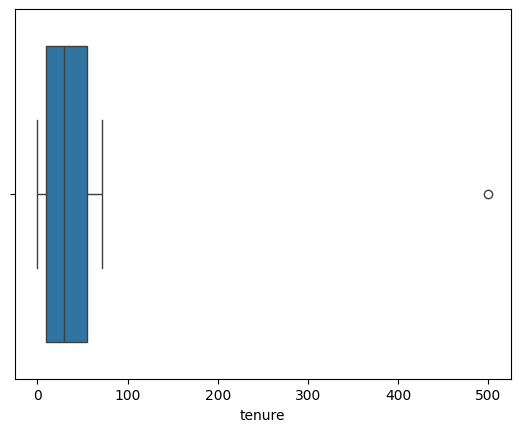

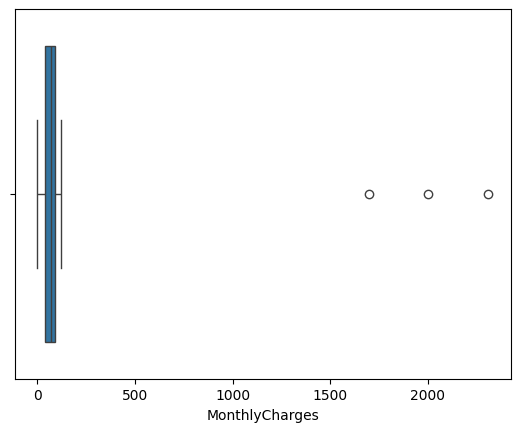

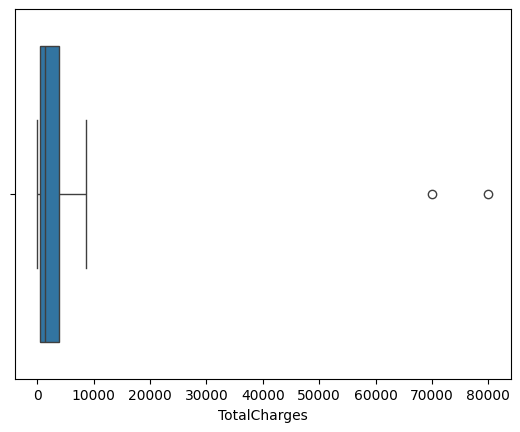

In [26]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Misal untuk kolom tenure
plt.figure()
sns.boxplot(x = df_load['tenure'])
plt.show()
# dan seterusnya untuk kedua kolom yang tersisa secara berurut
plt.figure()
sns.boxplot(x = df_load['MonthlyCharges'])
plt.show()
plt.figure()
sns.boxplot(x = df_load['TotalCharges'])
plt.show()

# **Handling Outliers**

In [29]:
# Your code goes here
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
Q1 = df_load[cols].quantile(0.25)
Q3 = df_load[cols].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
print('Nilai Maximum dari masing-masing Variable adalah:')
print(maximum)

minimum = Q1 - (1.5 * IQR)
print('Nilai Minimum dari masing-masing Variable adalah:')
print(minimum)

for col in cols:
    df_load[col] = df_load[col].mask(df_load[col] > maximum[col], maximum[col])
    df_load[col] = df_load[col].mask(df_load[col] < minimum[col], minimum[col])

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[cols].describe())

Nilai Maximum dari masing-masing Variable adalah:
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64
Nilai Minimum dari masing-masing Variable adalah:
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


# **Detecting Out of Standard Values**

In [32]:
df_load.dtypes==object

,0
UpdatedAt,False
customerID,True
gender,True
SeniorCitizen,False
Partner,True
Dependents,True
tenure,False
PhoneService,True
MultipleLines,True
InternetService,True


In [33]:
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
  #write your command here
	print('\nUnique Values Count Before Standardized Variable', col_name)
	print(df_load[col_name].value_counts())


Unique Values Count Before Standardized Variable gender
gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: count, dtype: int64

Unique Values Count Before Standardized Variable SeniorCitizen
SeniorCitizen
0    5822
1    1128
Name: count, dtype: int64

Unique Values Count Before Standardized Variable Partner
Partner
No     3591
Yes    3359
Name: count, dtype: int64

Unique Values Count Before Standardized Variable Dependents
Dependents
No     4870
Yes    2060
Iya      20
Name: count, dtype: int64

Unique Values Count Before Standardized Variable PhoneService
PhoneService
Yes    6281
No      669
Name: count, dtype: int64

Unique Values Count Before Standardized Variable MultipleLines
MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: count, dtype: int64

Unique Values Count Before Standardized Variable InternetService
InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: count, dtyp

# **Standardized Categorical Variable**

In [37]:
df_load = df_load.replace(['Wanita', 'Laki-Laki', 'Churn', 'Iya'], ['Female', 'Male', 'Yes', 'Yes'])

#Loop
for col_name in list(['gender', 'Dependents', 'Churn']):
 # write your command here
 print('\nUnique Values Count After Standardized Variable', col_name)
 print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
gender
Male      3505
Female    3445
Name: count, dtype: int64

Unique Values Count After Standardized Variable Dependents
Dependents
No     4870
Yes    2080
Name: count, dtype: int64

Unique Values Count After Standardized Variable Churn
Churn
No     5114
Yes    1836
Name: count, dtype: int64


Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah:

Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standardkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
Dependents (Yes, No, Iya), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
Churn (Yes, No, Churn), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
Setelah kita standardkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value-nya.